<a href="https://colab.research.google.com/github/rajitakolla/INFO5082/blob/main/HeadLines_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Head Lines Dataset


In [50]:
''' This would be a short text dataset
This dataset can be downloaded from kaggle,
Data scraped from the Guardian Business contains the headlines and last updated date of articles from the end of December 2017 to July 19th, 2020 since the Guardian Business does not offer preview text.
Since only the short text as in a single line headline would be used in the modelling, hence the short text
'''
# Load data
import pandas as pd
input_df=pd.read_csv("/content/guardian_headlines.csv")
input_df['Time'] = pd.to_datetime(input_df['Time'], errors='coerce')
input_df.head()

,Time,Headlines
0,2020-07-18,Johnson is asking Santa for a Christmas recovery
1,2020-07-18,‘I now fear the worst’: four grim tales of wor...
2,2020-07-18,Five key areas Sunak must tackle to serve up e...
3,2020-07-18,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,2020-07-18,The Week in Patriarchy \n\n\n Bacardi's 'lad...


From the above sample output we can infer there are many punctuations, case sensitive letter, We need to use data filteration techniques to do data cleaning The practices which I use here are

1.   convert all to lower case
2.   Remove punctuations
3.   Frequent Words Removal






#Data Cleaning

In [51]:
#steps involving all the basic steps of preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words=stopwords.words("english")
# cleaning the text data
input_df['cleaned_data'] = input_df['Headlines'].str.replace(r"\W", " ").str.strip()# 1.To remove special characters and punctuations
input_df['cleaned_data'] = input_df['cleaned_data'].str.replace(r'\d+',"") #2.To remove Numbers
input_df['cleaned_data'] = input_df['cleaned_data'].apply(lambda x: " ".join(x.lower() for x in x.split())) #convert the whole text into lower case
input_df['cleaned_data'] = input_df['cleaned_data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words)) #remove all stop words
#input_df['cleaned text review'] # dataframe column that would be used for further process
input_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Time,Headlines,cleaned_data
0,2020-07-18,Johnson is asking Santa for a Christmas recovery,johnson asking santa christmas recovery
1,2020-07-18,‘I now fear the worst’: four grim tales of wor...,fear worst four grim tales working life upende...
2,2020-07-18,Five key areas Sunak must tackle to serve up e...,five key areas sunak must tackle serve economi...
3,2020-07-18,Covid-19 leaves firms ‘fatally ill-prepared’ f...,covid leaves firms fatally ill prepared deal b...
4,2020-07-18,The Week in Patriarchy \n\n\n Bacardi's 'lad...,week patriarchy bacardi lady vodka latest long...
...,...,...,...
17795,2017-12-17,How investing in solar energy can create a bri...,investing solar energy create brighter future ...
17796,2017-12-17,Poundland suppliers hit by insurance downgrade,poundland suppliers hit insurance downgrade
17797,2017-12-17,Cryptocurrencies: City watchdog to investigate...,cryptocurrencies city watchdog investigate new...
17798,2017-12-17,Unilever sells household name spreads to KKR f...,unilever sells household name spreads kkr bn


In [52]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

#Exploratory Data Analysis

In [53]:
import numpy as np
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

actual_data = input_df["cleaned_data"]
actual_data.index = input_df["Time"]

In [55]:
actual_data

Time
2020-07-18              johnson asking santa christmas recovery
2020-07-18    fear worst four grim tales working life upende...
2020-07-18    five key areas sunak must tackle serve economi...
2020-07-18    covid leaves firms fatally ill prepared deal b...
2020-07-18    week patriarchy bacardi lady vodka latest long...
                                    ...                        
2017-12-17    investing solar energy create brighter future ...
2017-12-17          poundland suppliers hit insurance downgrade
2017-12-17    cryptocurrencies city watchdog investigate new...
2017-12-17         unilever sells household name spreads kkr bn
2017-12-17    guardian view ryanair model union friendly com...
Name: cleaned_data, Length: 17800, dtype: object

In [56]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

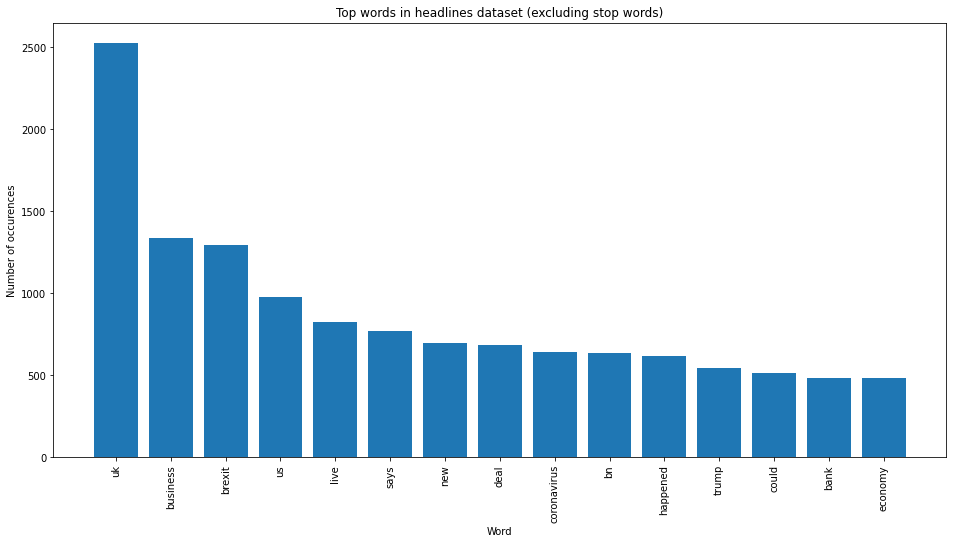

In [57]:
count_vectorizer = CountVectorizer()
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=actual_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [58]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [59]:
tagged_headlines = [TextBlob(actual_data[i]).pos_tags for i in range(actual_data.shape[0])]

In [60]:
tagged_headlines_df = pd.DataFrame({'tags':tagged_headlines})

word_counts = [] 
pos_counts = {}

for headline in tagged_headlines_df[u'tags']:
    word_counts.append(len(headline))
    for tag in headline:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per headline: ', np.mean(word_counts))

Total number of words:  141813
Mean number of words per headline:  7.967022471910112


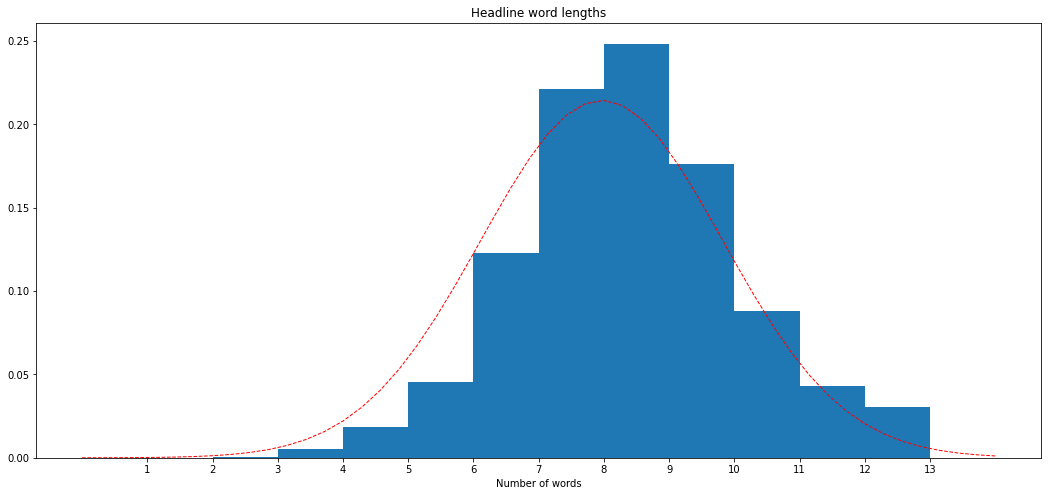

In [61]:
y = stats.norm.pdf(np.linspace(0,14,50), np.mean(word_counts), np.std(word_counts))

fig, ax = plt.subplots(figsize=(18,8))
ax.hist(word_counts, bins=range(1,14), density=True);
ax.plot(np.linspace(0,14,50), y, 'r--', linewidth=1);
ax.set_title('Headline word lengths');
ax.set_xticks(range(1,14));
ax.set_xlabel('Number of words');
plt.show()

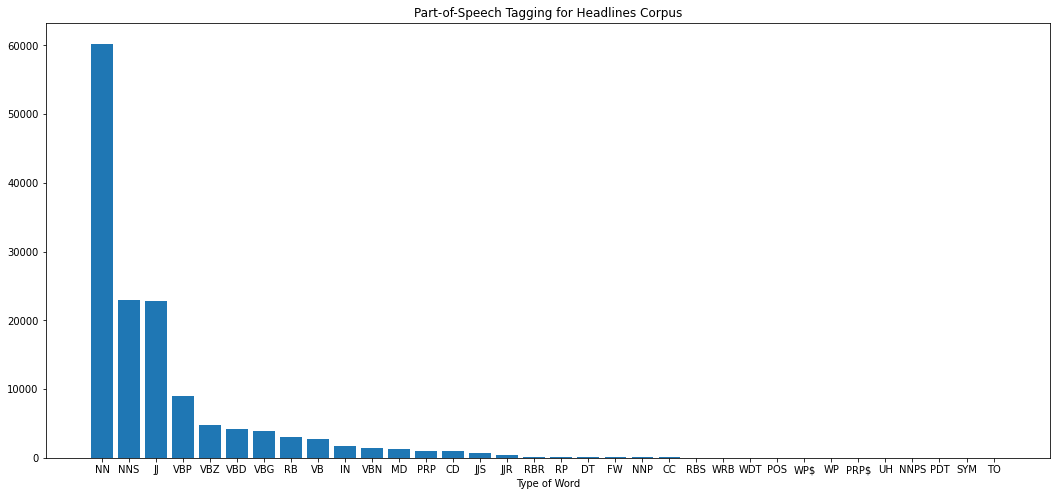

In [62]:
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

fig, ax = plt.subplots(figsize=(18,8))
ax.bar(range(len(pos_counts)), pos_sorted_counts);
ax.set_xticks(range(len(pos_counts)));
ax.set_xticklabels(pos_sorted_types);
ax.set_title('Part-of-Speech Tagging for Headlines Corpus');
ax.set_xlabel('Type of Word');

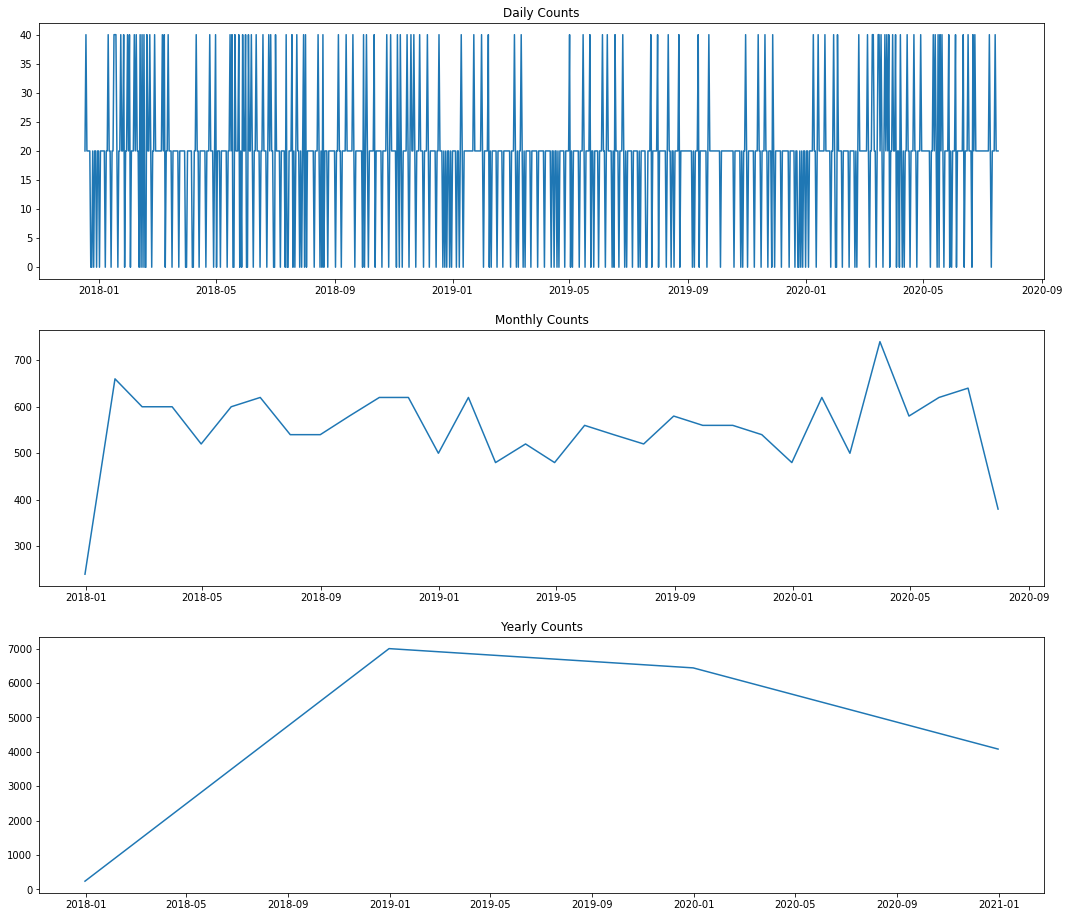

In [65]:
yearly_counts = actual_data.resample('A').count()
daily_counts = actual_data.resample('D').count()
monthly_counts = actual_data.resample('M').count()
fig, ax = plt.subplots(3, figsize=(18,16))
ax[0].plot(daily_counts);
ax[0].set_title('Daily Counts');
ax[1].plot(monthly_counts);
ax[1].set_title('Monthly Counts');
ax[2].plot(yearly_counts);
ax[2].set_title('Yearly Counts');
plt.show()

#LSA Implementation

In [70]:
actual_data.size

17800

In [83]:
cv = CountVectorizer()

x_train = actual_data.sample(n=10000, random_state=0).values
svd_matrix = cv.fit_transform(x_train)
print('Headline after vectorization: \n{}'.format(svd_matrix[123]))


Headline after vectorization: 
  (0, 9928)	1
  (0, 6480)	1
  (0, 5195)	1
  (0, 8804)	1
  (0, 5878)	1
  (0, 8763)	1


In [84]:
n_topics = 8

In [86]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

In [89]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(svd_matrix)

In [92]:
from collections import Counter
def get_keys(topic_matrix):
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [93]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [94]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [95]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, svd_matrix, cv)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  uk business brexit live happened economy year sales high growth
Topic 2:  business live happened agenda observer markets us trade trump leader
Topic 3:  brexit guardian deal view britain eu may watch says william
Topic 4:  finance pratley nils bid long stock takeover woodford virgin sports
Topic 5:  us trump china trade project jobs war economists syndicate tariffs
Topic 6:  says coronavirus bank pay crisis could firms england climate chief
Topic 7:  new bn first time loss british plans jobs plan amid
Topic 8:  deal new rescue trump eu trade amazon faces johnson competition


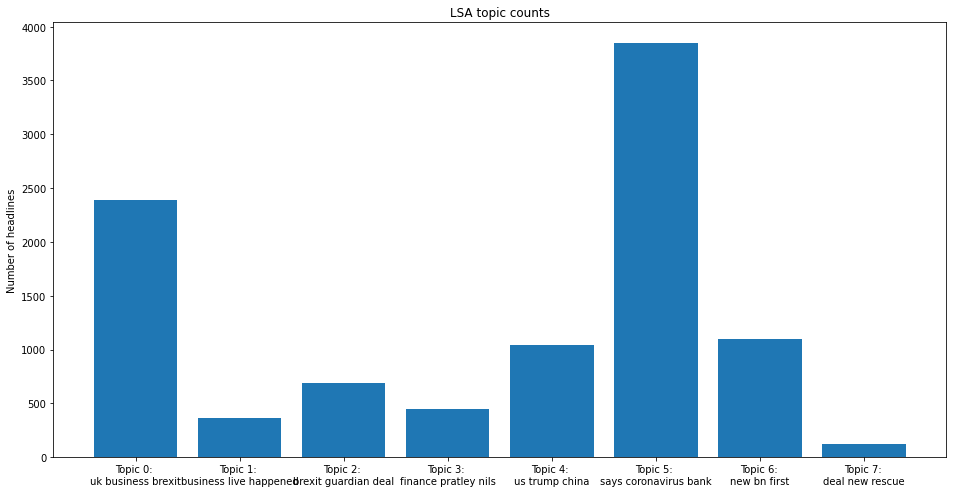

In [97]:
top_3_words = get_top_n_words(3, lsa_keys, svd_matrix, cv)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of headlines');
ax.set_title('LSA topic counts');
plt.show()

#LDA Model

In [99]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(svd_matrix)

In [100]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [101]:
top_n_words_lda = get_top_n_words(10, lda_keys, svd_matrix, cv)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  business uk live happened brexit us high coronavirus markets street
Topic 2:  uk guardian business view observer oil new rise firm office
Topic 3:  uk jobs brexit project bank says england economists syndicate economy
Topic 4:  pay new uk world back long letters women brief bank
Topic 5:  uk brexit deal us trade china trump says economy war
Topic 6:  uk britain mps lockdown brexit business merger cut australia still
Topic 7:  finance pratley nils uk bn firms could eu coronavirus energy
Topic 8:  may crisis climate uk owner company people deal covid london


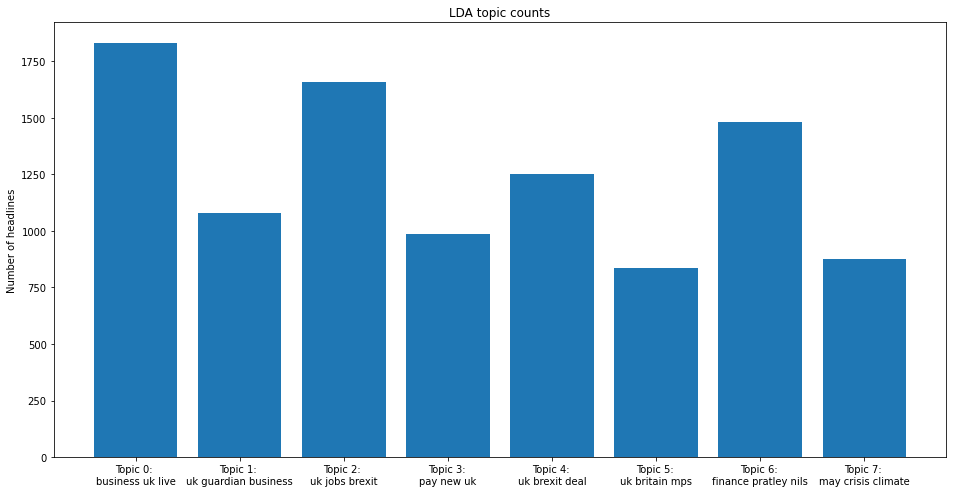

In [103]:
top_3_words = get_top_n_words(3, lda_keys, svd_matrix, cv)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of headlines');